In [1]:
import xarray as xr
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [2]:
dataset = pd.read_csv('/media/sany/SSD/Document/Project_research/Climate/ML_CYCLONE/Data/April 12 Final (6-24)Date_added - Finaldata1979-2020116.csv')
dataset

,Cyclone No,Date,hours,minMSL,Maxwind,lat,lon,lat+1,lon+1,lat+2,...,lat+5,lon+5,lat+6,lon+6,lat+12,lon+12,lat+18,lon+18,lat+24,lon+24
0,1,1979-05-07 22:00:00,1,99568.805,17.309776,6.75,86.50,6.75,86.25,6.75,...,6.75,86.00,6.75,86.00,6.50,86.00,6.50,86.00,7.75,86.25
1,1,1979-05-07 23:00:00,2,99571.960,15.422698,6.75,86.25,6.75,86.25,6.75,...,6.75,86.00,6.75,85.75,6.25,86.00,6.75,86.00,7.75,86.25
2,1,1979-05-08 0:00:00,3,99591.305,15.190290,6.75,86.25,6.75,86.00,6.75,...,6.75,85.75,6.75,86.00,6.25,86.00,6.75,86.25,8.00,86.25
3,1,1979-05-08 1:00:00,4,99651.000,15.313608,6.75,86.00,6.75,86.00,6.75,...,6.75,86.00,6.75,86.00,6.50,85.75,7.00,86.50,8.00,86.25
4,1,1979-05-08 2:00:00,5,99684.900,15.582188,6.75,86.00,6.75,86.00,6.75,...,6.75,86.00,6.75,86.00,6.50,86.00,7.25,86.50,8.00,86.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,55,2020-11-26 5:00:00,46,100028.670,18.663320,13.00,79.75,13.25,79.75,13.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4434,55,2020-11-26 6:00:00,47,100032.140,18.751280,13.25,79.75,13.25,79.50,13.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4435,55,2020-11-26 7:00:00,48,99978.140,18.789482,13.25,79.50,13.50,79.75,13.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4436,55,2020-11-26 8:00:00,49,99899.230,18.364544,13.50,79.75,13.50,79.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
dataset.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]]

,Cyclone No,hours,minMSL,Maxwind,lat,lon,lat+1,lon+1,lat+2,lon+2,lat+3,lon+3,lat+4,lon+4,lat+5,lon+5,lat+6,lon+6,lat+12,lon+12
0,1,1,99568.805,17.309776,6.75,86.50,6.75,86.25,6.75,86.25,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00,6.50,86.00
1,1,2,99571.960,15.422698,6.75,86.25,6.75,86.25,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75,6.25,86.00
2,1,3,99591.305,15.190290,6.75,86.25,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75,6.75,86.00,6.25,86.00
3,1,4,99651.000,15.313608,6.75,86.00,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75,6.75,86.00,6.75,86.00,6.50,85.75
4,1,5,99684.900,15.582188,6.75,86.00,6.75,86.00,6.75,86.00,6.75,85.75,6.75,86.00,6.75,86.00,6.75,86.00,6.50,86.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4433,55,46,100028.670,18.663320,13.00,79.75,13.25,79.75,13.25,79.50,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN,NaN,NaN
4434,55,47,100032.140,18.751280,13.25,79.75,13.25,79.50,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4435,55,48,99978.140,18.789482,13.25,79.50,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4436,55,49,99899.230,18.364544,13.50,79.75,13.50,79.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#select features and target
#X = dataset.iloc[:,[0,1,2,3,4,11]].values
X = dataset.iloc[:,[0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]].values #for 18 hours prediction
Y = np.column_stack((dataset['lon+18'], dataset['lat+18']))

In [5]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
X = imputer.fit_transform(X)
Y = imputer.fit_transform(Y)

In [6]:
Y

array([[86.        ,  6.5       ],
       [86.        ,  6.75      ],
       [86.25      ,  6.75      ],
       ...,
       [86.66415313, 16.85520592],
       [86.66415313, 16.85520592],
       [86.66415313, 16.85520592]])

In [7]:
# Convert in numeric 
from sklearn.preprocessing import LabelEncoder
le_date = LabelEncoder()
#X[:,1] = le_date.fit_transform(X[:,1])

In [8]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)
print("-----------------------------------------------------------------")
print(Y)

[[-1.73798725e+00 -1.41957570e+00  7.41379446e-01 ... -2.55110196e-01
  -2.87829712e+00 -2.40984164e-01]
 [-1.73798725e+00 -1.38751489e+00  7.45289949e-01 ... -3.32106205e-01
  -2.94879578e+00 -2.40984164e-01]
 [-1.73798725e+00 -1.35545408e+00  7.69267344e-01 ... -2.55110196e-01
  -2.94879578e+00 -2.40984164e-01]
 ...
 [ 1.62763127e+00  8.72822618e-02  1.24873468e+00 ... -4.37671642e-15
   0.00000000e+00  0.00000000e+00]
 [ 1.62763127e+00  1.19343069e-01  1.15092872e+00 ... -4.37671642e-15
   0.00000000e+00  0.00000000e+00]
 [ 1.62763127e+00  1.51403877e-01  1.11124114e+00 ... -4.37671642e-15
   0.00000000e+00  0.00000000e+00]]
-----------------------------------------------------------------
[[86.          6.5       ]
 [86.          6.75      ]
 [86.25        6.75      ]
 ...
 [86.66415313 16.85520592]
 [86.66415313 16.85520592]
 [86.66415313 16.85520592]]


In [9]:
# information
print("Total number of Cyclone:" + str(dataset["Cyclone No"][4437]))
print("--------------------------")
print(dataset["Cyclone No"][3098:3100])


Total number of Cyclone:55
--------------------------
3098    40
3099    41
Name: Cyclone No, dtype: int64


In [10]:
X[:2]

array([[-1.73798725, -1.4195757 ,  0.74137945, -0.67300485, -2.41235007,
        -0.12350485, -2.44133926, -0.19432021, -2.47086912, -0.19124124,
        -2.50068168, -0.26316801, -2.53230083, -0.26038189, -2.56466213,
        -0.25759062, -2.59770058, -0.2551102 , -2.87829712, -0.24098416],
       [-1.73798725, -1.38751489,  0.74528995, -1.20909391, -2.41235007,
        -0.19702792, -2.44133926, -0.19432021, -2.47086912, -0.26588206,
        -2.50068168, -0.26316801, -2.53230083, -0.26038189, -2.56466213,
        -0.25759062, -2.59770058, -0.33210621, -2.94879578, -0.24098416]])

In [11]:
# Splitting without randomize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
k = 3098 #index for 40'th cyclone

X_train = X[:k,:]
X_test = X[k:,:]    

Y_train = Y[:k]    
Y_test= Y[k:] 

In [12]:
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import mean_squared_error

#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=10)

## ANN Model

In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

In [14]:
print("X_train.shape, Y_train.shape, X_test.shape, Y_train.shape")
print(X_train.shape,Y_train.shape,X_test.shape,Y_train.shape)

X_train.shape, Y_train.shape, X_test.shape, Y_train.shape
(3098, 20) (3098, 2) (1340, 20) (3098, 2)


In [15]:
#model.summary()
#[layer1, layer2, layer3, layer4] = model.layers

# Examine Weights shapes
#W1,b1 = layer1.get_weights()
#W2,b2 = layer2.get_weights()
#W3,b3 = layer3.get_weights()

#print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
#print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
#print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")


In [16]:
from keras.callbacks import EarlyStopping

# Define early stopping criteria
early_stop = EarlyStopping(monitor='val_loss', patience=20,verbose=1, mode='min')

# Define model 
model = Sequential([
    tf.keras.Input((X_train.shape[1]),),
    Dense(units=100, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu', name='L1'),
    Dense(units=50, kernel_regularizer=tf.keras.regularizers.l2(0.002), activation='relu', name='L2'), 
    Dense(units=2, activation='linear', name='L3'),
], name='my_model')

# Compile model
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['mean_absolute_error']
)

# Fit model with early stopping
history = model.fit(X_train, Y_train, validation_split=0.33, epochs=100, batch_size=32, verbose=1, callbacks=[early_stop])


Epoch 1/100
65/65 [==============================] - 0s 2ms/step - loss: 45.7059 - mean_absolute_error: 45.9944 - val_loss: 37.8213 - val_mean_absolute_error: 38.0813
Epoch 2/100
65/65 [==============================] - 0s 1ms/step - loss: 23.6638 - mean_absolute_error: 23.8808 - val_loss: 16.6395 - val_mean_absolute_error: 16.8172
Epoch 3/100
65/65 [==============================] - 0s 965us/step - loss: 11.2026 - mean_absolute_error: 11.3736 - val_loss: 16.2539 - val_mean_absolute_error: 16.4368
Epoch 4/100
65/65 [==============================] - 0s 2ms/step - loss: 8.8815 - mean_absolute_error: 9.0453 - val_loss: 15.9411 - val_mean_absolute_error: 16.1212
Epoch 5/100
65/65 [==============================] - 0s 1ms/step - loss: 7.1554 - mean_absolute_error: 7.3157 - val_loss: 16.2760 - val_mean_absolute_error: 16.4609
Epoch 6/100
65/65 [==============================] - 0s 1ms/step - loss: 6.1851 - mean_absolute_error: 6.3377 - val_loss: 15.2996 - val_mean_absolute_error: 15.4877
Ep

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


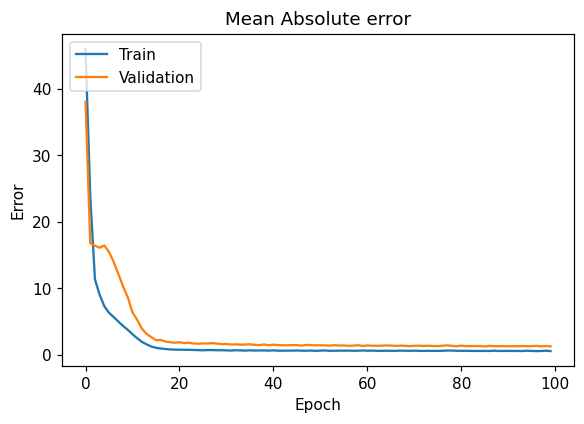

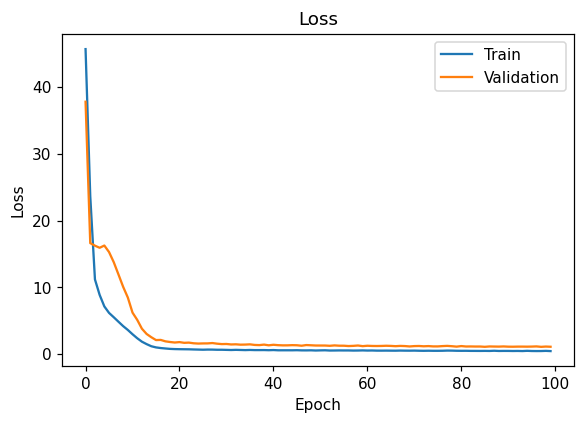

In [17]:
print(history.history.keys())

# summarize history for accuracy
#with plt.style.context('ggplot'):
plt.figure(dpi=110)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean Absolute error')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


# summarize history for loss
#with plt.style.context('ggplot'):
plt.figure(dpi=110)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()
    


In [18]:
Y_pred = model.predict(X_test)
print(Y_pred[:10])

[[92.657074 19.007265]
 [84.93167  10.341963]
 [85.632774 10.486332]
 [85.970215 10.580013]
 [86.374435 10.502598]
 [86.258675 10.69489 ]
 [86.108    10.625225]
 [86.131516 10.637092]
 [86.13496  10.77519 ]
 [86.129875 10.957305]]


In [19]:
lon_test = Y_test[:,0]
lat_test = Y_test[:,1]

lon_pred = Y_pred[:,0]
lat_pred = Y_pred[:,1]

random_dataset = pd.DataFrame()
random_dataset['lon_test'] = lon_test
random_dataset['lat_test'] = lat_test

random_dataset['lon_pred'] = lon_pred
random_dataset['lat_pred'] = lat_pred
random_dataset['deviation'] = np.sqrt(((lon_test-lon_pred)**2)+ ((lat_test-lat_pred)**2))

print("  ")
print("The average error for the deviation is "+ str(random_dataset['deviation'].mean()))
print("  ")

random_dataset

  
The average error for the deviation is 1.726810163504217
  


,lon_test,lat_test,lon_pred,lat_pred,deviation
0,86.664153,16.855206,92.657074,19.007265,6.367610
1,83.250000,8.500000,84.931671,10.341963,2.494162
2,83.500000,8.750000,85.632774,10.486332,2.750195
3,83.500000,9.000000,85.970215,10.580013,2.932303
4,83.750000,9.000000,86.374435,10.502598,3.024146
...,...,...,...,...,...
1335,86.664153,16.855206,88.398178,17.972330,2.062719
1336,86.664153,16.855206,88.556396,18.088556,2.258703
1337,86.664153,16.855206,87.042076,17.622379,0.855208
1338,86.664153,16.855206,87.372650,17.563381,1.001739


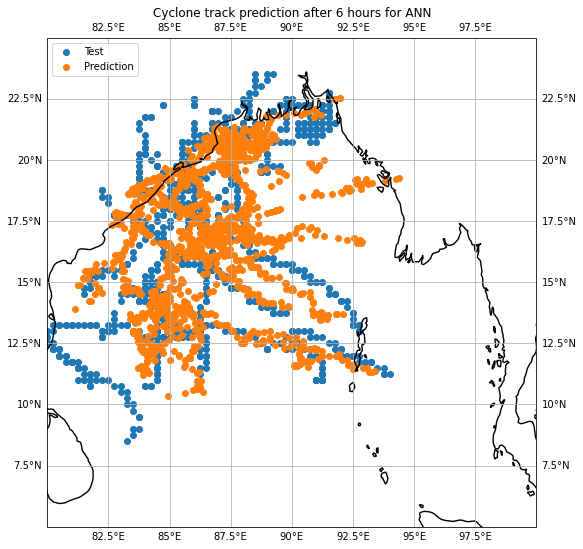

In [20]:
import xarray as xr

import cartopy.feature as cf
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

fig = plt.figure(figsize=(16,9))
ax = plt.axes(projection=ccrs.PlateCarree())
plt.title("Cyclone track prediction after 6 hours for ANN")


plt.scatter(lon_test, lat_test, label='Test')
plt.scatter(lon_pred, lat_pred, label='Prediction')

ax.coastlines(linewidth=1.4)
ax.gridlines(draw_labels=True)
ax.set_extent([80, 100, 5, 25]) 

plt.legend(loc='upper left')

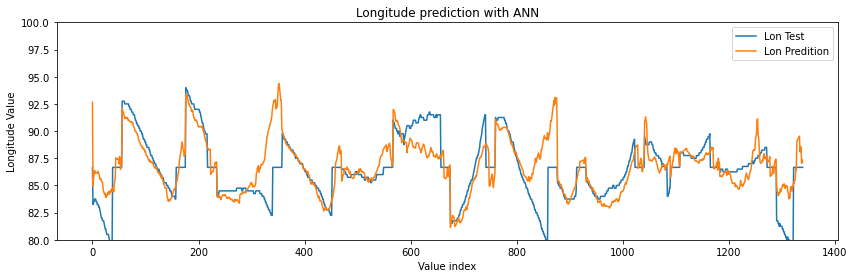

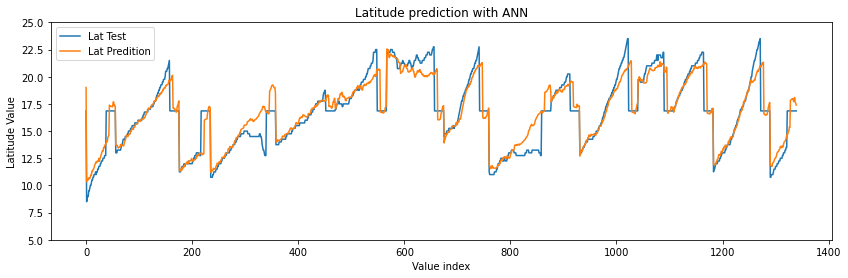

In [21]:
plt.figure(figsize=(14,4))
plt.plot(lon_test, label='Lon Test')
plt.plot(lon_pred, label='Lon Predition')
plt.xlabel('Value index')
plt.ylabel('Longitude Value')
plt.ylim(80,100)
plt.title("Longitude prediction with ANN")
plt.legend()

plt.figure(figsize=(14,4))
plt.plot(lat_test, label='Lat Test')
plt.plot(lat_pred, label='Lat Predition')
plt.xlabel('Value index')
plt.ylabel('Latitude Value')
plt.ylim(5, 25)
plt.title("Latitude prediction with ANN")
plt.legend()

In [22]:
#for single cyclone
#dataset[:21]

In [23]:
#X_test